In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
density_log = pd.read_csv('Barnett_density_data.csv')
sonic_log = pd.read_csv('Barnett_sonic_logs.csv')

In [3]:
print(density_log.info())
print(sonic_log.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12197 entries, 0 to 12196
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Depth(ft)       12197 non-null  float64
 1   Density (g/cc)  12187 non-null  float64
dtypes: float64(2)
memory usage: 190.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   depth (ft)                     2391 non-null   float64
 1   delta_t_compressional (us/ft)  2391 non-null   float64
 2   delta_t_shear (us/ft)          2391 non-null   float64
dtypes: float64(3)
memory usage: 56.2 KB
None


In [4]:
density_log.rename(columns={'Depth(ft)': 'depth_ft', 'Density (g/cc)': 'density_gcc'}, inplace=True)
sonic_log.rename(columns={'depth (ft)': 'depth_ft'}, inplace=True)

In [5]:
logs = pd.merge(density_log, sonic_log, on='depth_ft', how='inner')

In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2391 entries, 0 to 2390
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   depth_ft                       2391 non-null   float64
 1   density_gcc                    2388 non-null   float64
 2   delta_t_compressional (us/ft)  2391 non-null   float64
 3   delta_t_shear (us/ft)          2391 non-null   float64
dtypes: float64(4)
memory usage: 93.4 KB


In [7]:
logs['porosity'] = (2.7 - logs.density_gcc)/(2.7 - 1)

In [8]:
logs.head()

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity
0,5000.0,2.4061,77.2805,114.8416,0.172882
1,5000.5,2.3836,78.1448,114.1503,0.186118
2,5001.0,2.2382,72.3262,104.8720,0.271647
3,5001.5,2.0972,69.1538,101.2285,0.354588
4,5002.0,2.5200,67.9961,104.3231,0.105882


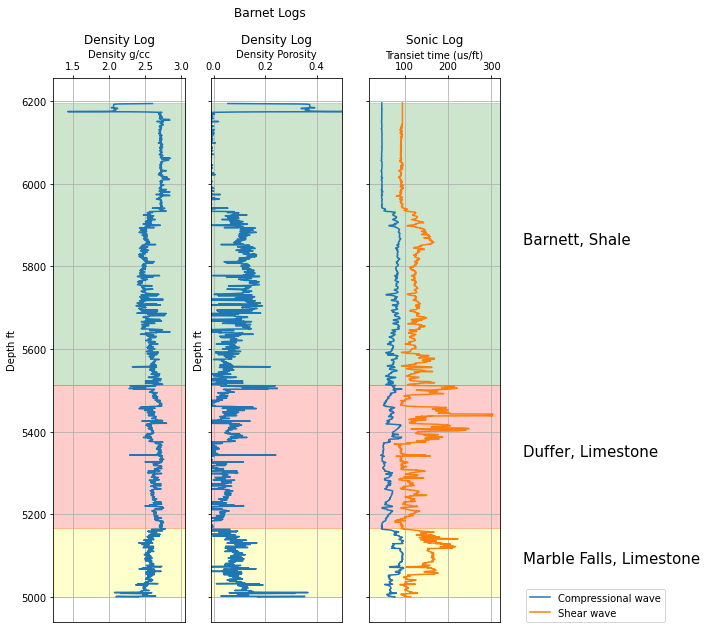

In [9]:
fig, ax = plt.subplots(figsize=(8, 10), nrows=1, ncols=3, sharey=True)
fig.suptitle('Barnet Logs')

ax[0].set_title('Density Log')
ax[0].plot(logs.density_gcc, logs.depth_ft)
ax[0].set_xlabel('Density g/cc')
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[0].set_xlim(logs['density_gcc'].min()-0.2, logs['density_gcc'].max()+0.2)
ax[0].invert_yaxis()
ax[0].set_ylabel('Depth ft')

ax[0].fill_between(ax[0].get_xlim(), 5000, 5167, color='yellow', alpha=0.2)
ax[0].fill_between(ax[0].get_xlim(), 5167, 5514, color='red', alpha=0.2)
ax[0].fill_between(ax[0].get_xlim(), 5514, 6195, color='green', alpha=0.2)


ax[0].grid()

ax[1].set_title('Density Log')
ax[1].plot(logs.porosity, logs.depth_ft)
ax[1].set_xlabel('Density Porosity')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top')
ax[1].set_xlim(-0.01, .5)
ax[1].invert_yaxis()
ax[1].set_ylabel('Depth ft')

ax[1].fill_between([-0.01, 0.5], 5000, 5167, color='yellow', alpha=0.2)
ax[1].text(1.2, (5000+5167)/2, 'Marble Falls, Limestone', fontsize=15)

ax[1].fill_between([-0.01, 0.5], 5167, 5514, color='red', alpha=0.2)
ax[1].text(1.2, (5167+5514)/2, 'Duffer, Limestone', fontsize=15)

ax[1].fill_between([-0.01, 0.5], 5514, 6195, color='green', alpha=0.2)
ax[1].text(1.2, (5514+6195)/2, 'Barnett, Shale', fontsize=15)

ax[1].grid()



ax[2].set_title('Sonic Log')
ax[2].plot(logs['delta_t_compressional (us/ft)'], logs.depth_ft, label='Compressional wave')
ax[2].plot(logs['delta_t_shear (us/ft)'], logs.depth_ft, label='Shear wave')
ax[2].set_xlabel('Transiet time (us/ft)')
ax[2].xaxis.set_ticks_position('top')
ax[2].xaxis.set_label_position('top')
ax[2].set_xlim(17, 320)
ax[2].legend(loc=(1.2, 0))
ax[2].grid()

ax[2].fill_between([17, 320], 5000, 5167, color='yellow', alpha=0.2)
ax[2].fill_between([17, 320], 5167, 5514, color='red', alpha=0.2)
ax[2].fill_between([17, 320], 5514, 6195, color='green', alpha=0.2)


plt.show()


In [10]:
logs['Vp (m/s)'] = (1e6 * np.power(logs['delta_t_compressional (us/ft)'], -1) * 0.3048)
logs['Vs (m/s)'] = (1e6 * np.power(logs['delta_t_shear (us/ft)'], -1) * 0.3048)

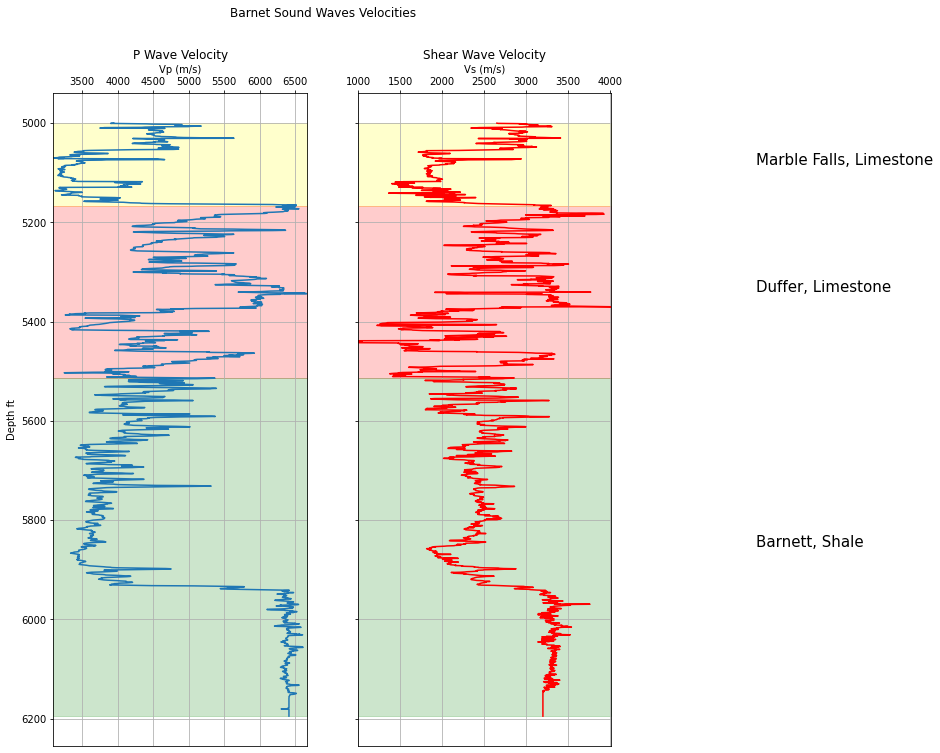

In [11]:
fig, ax = plt.subplots(figsize=(10, 12), nrows=1, ncols=2, sharey=True)
fig.suptitle('Barnet Sound Waves Velocities')

ax[0].set_title('P Wave Velocity')
ax[0].plot(logs['Vp (m/s)'], logs.depth_ft)
ax[0].set_xlabel('Vp (m/s)')
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[0].set_xlim(logs['Vp (m/s)'].min() - 5, logs['Vp (m/s)'].max() + 5)
ax[0].invert_yaxis()
ax[0].set_ylabel('Depth ft')

ax[0].fill_between(ax[0].get_xlim(), 5000, 5167, color='yellow', alpha=0.2)
ax[0].text(13000, (5000+5167)/2, 'Marble Falls, Limestone', fontsize=15)

ax[0].fill_between(ax[0].get_xlim(), 5167, 5514, color='red', alpha=0.2)
ax[0].text(13000, (5167+5514)/2, 'Duffer, Limestone', fontsize=15)

ax[0].fill_between(ax[0].get_xlim(), 5514, 6195, color='green', alpha=0.2)
ax[0].text(13000, (5514+6195)/2, 'Barnett, Shale', fontsize=15)

ax[0].grid()



ax[1].set_title('Shear Wave Velocity')
ax[1].plot(logs['Vs (m/s)'], logs.depth_ft, color='red')

ax[1].set_xlabel('Vs (m/s)')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top')

ax[1].set_xlim(logs['Vs (m/s)'].min() - 5, logs['Vs (m/s)'].max() + 5)
ax[1].grid()


ax[1].fill_between(ax[1].get_xlim(), 5000, 5167, color='yellow', alpha=0.2)

ax[1].fill_between(ax[1].get_xlim(), 5167, 5514, color='red', alpha=0.2)

ax[1].fill_between(ax[1].get_xlim(), 5514, 6195, color='green', alpha=0.2)

plt.show()

In [12]:
def G(rho, dts):
    return (rho*1e3 * (1e6 * np.power(dts, -1) * 0.3048)**2)

def K(rho, dtp, G):
    return (rho*1e3 * (1e6 * np.power(dtp, -1) * 0.3048)**2 - 4*G/3)

def E(G, K):
    e = 9*G*K/(G+3*K)
    return e

In [13]:
def porosity_ucs(depths, phi_s):
    UCS=[]
    for depth, phi in zip(depths, phi_s):
        if phi > 0:
            if depth <=5514:
                ucs = 135.9 * np.exp(-4.8 * phi)
            else:
                ucs = 1.001 * phi**(-1.143)
                
        else: ucs = np.nan
        UCS.append(ucs)
    
    return UCS

def E_ucs(depths, E):
    UCS = []
    for depth, e in zip(depths, E):
        if depth <= 5167:
            ucs = 0.4067 * np.power(e*1e3, 0.51)
        elif depth > 5167 and depth <= 5514:
            ucs = 2.4 * np.power(e*1e3, 0.34)
        else:
            ucs = 0.0528 * np.power(e*1e3, 0.712)
        
        UCS.append(ucs)
    
    return UCS

In [14]:
logs['G (GPA)'] = G(logs.density_gcc, logs['delta_t_shear (us/ft)'])/1e9
logs['K (GPA)'] = K(logs.density_gcc, logs['delta_t_compressional (us/ft)'], logs['G (GPA)'])/1e9
logs['E (GPA)'] = E(logs['G (GPA)'], logs['K (GPA)'])

In [15]:
logs['UCS_porosity (MPA)'] = porosity_ucs(logs.depth_ft, logs.porosity)
logs['UCS_sonic (MPA)'] = E_ucs(logs.depth_ft, logs['E (GPA)'])

In [16]:
cuts = pd.cut(logs.depth_ft, bins=[5000, 5167, 5514, 6195], include_lowest=True, 
              labels=['Marble Falls, Limestone', 'Duffer, Limestone', 'Barnett Shale'])
logs.groupby(cuts).mean()

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity,Vp (m/s),Vs (m/s),G (GPA),K (GPA),E (GPA),UCS_porosity (MPA),UCS_sonic (MPA)
depth_ft,,,,,,,,,,,,
"Marble Falls, Limestone",5083.50,2.553628,79.670642,141.650388,0.086101,3938.811906,2263.730608,13.742385,40.928557,36.887714,89.056382,84.728971
"Duffer, Limestone",5340.75,2.639847,63.070950,126.081698,0.035384,4965.223514,2607.168656,19.158520,67.186457,52.208044,107.729657,93.884150
Barnett Shale,5854.75,2.595981,66.676580,115.078778,0.061188,4867.054236,2732.028739,20.129464,66.292208,54.640276,59.771278,122.758940


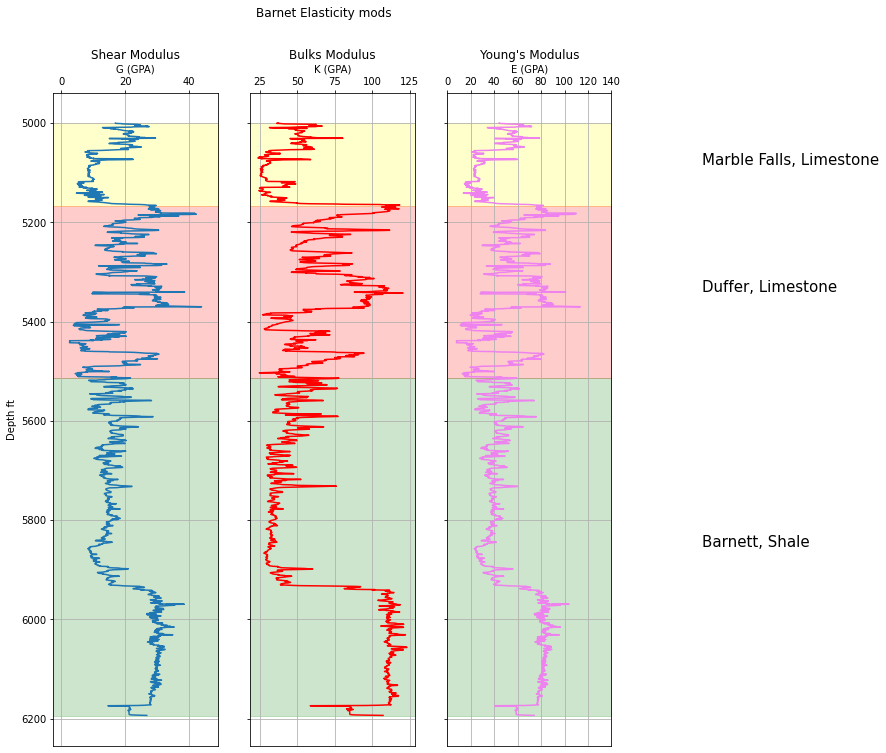

In [17]:
fig, ax = plt.subplots(figsize=(10, 12), nrows=1, ncols=3, sharey=True)
fig.suptitle('Barnet Elasticity mods')

ax[0].set_title('Shear Modulus')
ax[0].plot(logs['G (GPA)'], logs.depth_ft)
ax[0].set_xlabel('G (GPA)')
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[0].set_xlim(logs['G (GPA)'].min() - 5, logs['G (GPA)'].max() + 5)

ax[0].invert_yaxis()
ax[0].set_ylabel('Depth ft')

ax[0].fill_between(ax[0].get_xlim(), 5000, 5167, color='yellow', alpha=0.2)
ax[0].text(200, (5000+5167)/2, 'Marble Falls, Limestone', fontsize=15)

ax[0].fill_between(ax[0].get_xlim(), 5167, 5514, color='red', alpha=0.2)
ax[0].text(200, (5167+5514)/2, 'Duffer, Limestone', fontsize=15)

ax[0].fill_between(ax[0].get_xlim(), 5514, 6195, color='green', alpha=0.2)
ax[0].text(200, (5514+6195)/2, 'Barnett, Shale', fontsize=15)

ax[0].grid()



ax[1].set_title('Bulks Modulus')
ax[1].plot(logs['K (GPA)'], logs.depth_ft, color='red')

ax[1].set_xlabel('K (GPA)')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top')

ax[1].set_xlim(logs['K (GPA)'].min() - 5, logs['K (GPA)'].max() + 5)
ax[1].grid()


ax[1].fill_between(ax[1].get_xlim(), 5000, 5167, color='yellow', alpha=0.2)

ax[1].fill_between(ax[1].get_xlim(), 5167, 5514, color='red', alpha=0.2)

ax[1].fill_between(ax[1].get_xlim(), 5514, 6195, color='green', alpha=0.2)


ax[2].set_title("Young's Modulus")
ax[2].plot(logs['E (GPA)'], logs.depth_ft, color='violet')

ax[2].set_xlabel('E (GPA)')
ax[2].xaxis.set_ticks_position('top')
ax[2].xaxis.set_label_position('top')

ax[2].set_xlim(logs['E (GPA)'].min() - 5, logs['E (GPA)'].max() + 5)
ax[2].set_xticks([0, 20, 40, 60, 80, 100, 120, 140])
ax[2].grid()


ax[2].fill_between(ax[2].get_xlim(), 5000, 5167, color='yellow', alpha=0.2)

ax[2].fill_between(ax[2].get_xlim(), 5167, 5514, color='red', alpha=0.2)

ax[2].fill_between(ax[2].get_xlim(), 5514, 6195, color='green', alpha=0.2)

plt.show()


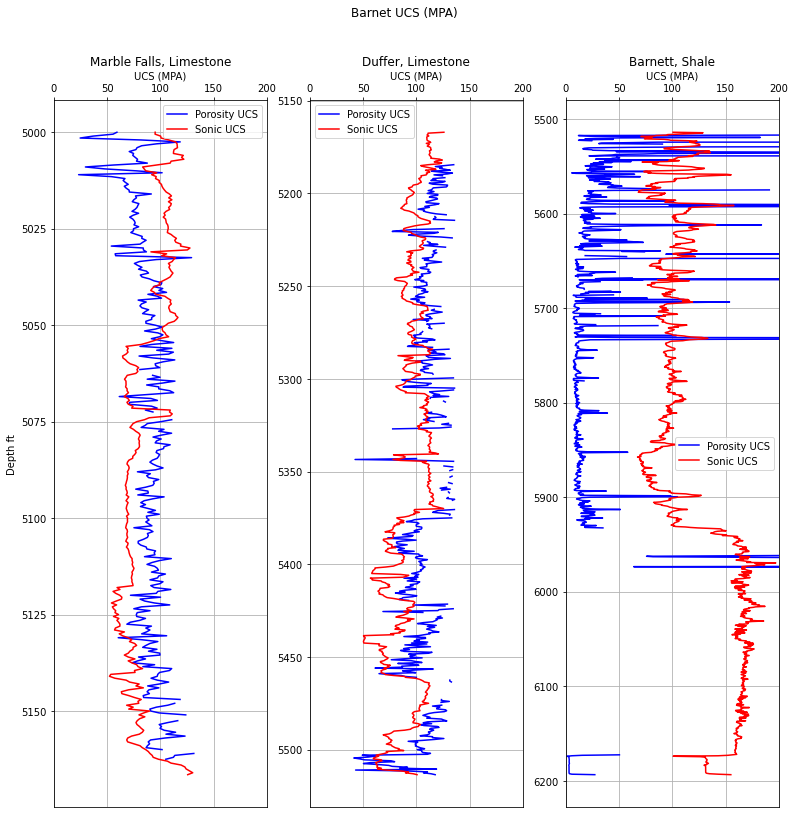

In [18]:
fig, ax = plt.subplots(figsize=(13, 13), nrows=1, ncols=3)
fig.suptitle('Barnet UCS (MPA)')
df1 = logs.query("depth_ft >= 5000 & depth_ft < 5167")
ax[0].plot(df1['UCS_porosity (MPA)'], df1.depth_ft, color='blue', label='Porosity UCS')
ax[0].plot(df1['UCS_sonic (MPA)'], df1.depth_ft, color='red', label='Sonic UCS')
ax[0].set_title('Marble Falls, Limestone')
ax[0].set_xlabel('UCS (MPA)')
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[0].set_xlim(0, 200)
ax[0].set_ylabel('Depth ft')
ax[0].invert_yaxis()
ax[0].legend()
ax[0].grid()


df1 = logs.query("depth_ft >= 5167 & depth_ft < 5514")
ax[1].plot(df1['UCS_porosity (MPA)'], df1.depth_ft, color='blue', label='Porosity UCS')
ax[1].plot(df1['UCS_sonic (MPA)'], df1.depth_ft, color='red', label='Sonic UCS')
ax[1].set_title('Duffer, Limestone')
ax[1].set_xlabel('UCS (MPA)')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top')
ax[1].set_xlim(0, 200)
ax[1].invert_yaxis()
ax[1].legend()
ax[1].grid()


df1 = logs.query("depth_ft >= 5514")
ax[2].plot(df1['UCS_porosity (MPA)'], df1.depth_ft, color='blue', label='Porosity UCS')
ax[2].plot(df1['UCS_sonic (MPA)'], df1.depth_ft, color='red', label='Sonic UCS')
ax[2].set_title('Barnett, Shale')
ax[2].set_xlabel('UCS (MPA)')
ax[2].xaxis.set_ticks_position('top')
ax[2].xaxis.set_label_position('top')
ax[2].set_xlim(0, 200)
ax[2].invert_yaxis()
ax[2].legend()
ax[2].grid()

In [19]:
logs[logs.depth_ft == 5080]

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity,Vp (m/s),Vs (m/s),G (GPA),K (GPA),E (GPA),UCS_porosity (MPA),UCS_sonic (MPA)
160,5080.0,2.5785,86.106,142.0503,0.071471,3539.823009,2145.718805,11.871696,32.3095,31.728959,96.43416,80.355691


In [20]:
logs[logs.depth_ft == 5465]

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity,Vp (m/s),Vs (m/s),G (GPA),K (GPA),E (GPA),UCS_porosity (MPA),UCS_sonic (MPA)
930,5465.0,2.7401,53.0863,92.9321,-0.023588,5741.594347,3279.813972,29.475748,90.329878,79.752504,NaN,111.379256


In [21]:
logs[logs.depth_ft == 5800]

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity,Vp (m/s),Vs (m/s),G (GPA),K (GPA),E (GPA),UCS_porosity (MPA),UCS_sonic (MPA)
1600,5800.0,2.5195,83.4715,121.5447,0.106176,3651.545737,2507.719382,15.84427,33.594474,41.075316,12.992231,101.742764


In [22]:
logs['UCS_porosity (psi)'] = logs['UCS_porosity (MPA)'] * 145.038
logs['UCS_sonic (psi)'] = logs['UCS_sonic (MPA)'] * 145.038

In [23]:
logs[logs.depth_ft == 5080]

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity,Vp (m/s),Vs (m/s),G (GPA),K (GPA),E (GPA),UCS_porosity (MPA),UCS_sonic (MPA),UCS_porosity (psi),UCS_sonic (psi)
160,5080.0,2.5785,86.106,142.0503,0.071471,3539.823009,2145.718805,11.871696,32.3095,31.728959,96.43416,80.355691,13986.617725,11654.628735


In [24]:
logs[logs.depth_ft == 5465]

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity,Vp (m/s),Vs (m/s),G (GPA),K (GPA),E (GPA),UCS_porosity (MPA),UCS_sonic (MPA),UCS_porosity (psi),UCS_sonic (psi)
930,5465.0,2.7401,53.0863,92.9321,-0.023588,5741.594347,3279.813972,29.475748,90.329878,79.752504,NaN,111.379256,NaN,16154.224542


In [25]:
logs[logs.depth_ft == 5800]

,depth_ft,density_gcc,delta_t_compressional (us/ft),delta_t_shear (us/ft),porosity,Vp (m/s),Vs (m/s),G (GPA),K (GPA),E (GPA),UCS_porosity (MPA),UCS_sonic (MPA),UCS_porosity (psi),UCS_sonic (psi)
1600,5800.0,2.5195,83.4715,121.5447,0.106176,3651.545737,2507.719382,15.84427,33.594474,41.075316,12.992231,101.742764,1884.367261,14756.566971
